___

#### Rick Fontenot
___


In [8]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import date
import sklearn
pd.set_option("display.max_columns", None, "display.max_rows", None)

import os
import sys
import tempfile
import mimetypes
import webbrowser

# Import the email modules we'll need
from email import policy
from email.parser import BytesParser

import re
import email

import missingno as msno



## Test reading in a single file as an example:


In [9]:
file1 = "https://raw.githubusercontent.com/rickfontenot/QTW/main/Case%20Study%204/data/1year.arff"

In [10]:
from scipy.io import arff

import pandas as pd

file1 = arff.loadarff('/Users/rickfontenot/Dropbox/SMU/DS7333 Quantifying World/QTW_Github/QTW/Case Study 4/data/1year.arff')
year1 = pd.DataFrame(file1[0])
year1['year']=1

file2 = arff.loadarff('/Users/rickfontenot/Dropbox/SMU/DS7333 Quantifying World/QTW_Github/QTW/Case Study 4/data/2year.arff')
year2 = pd.DataFrame(file2[0])
year2['year']=2

file3 = arff.loadarff('/Users/rickfontenot/Dropbox/SMU/DS7333 Quantifying World/QTW_Github/QTW/Case Study 4/data/3year.arff')
year3 = pd.DataFrame(file3[0])
year3['year']=3

file4 = arff.loadarff('/Users/rickfontenot/Dropbox/SMU/DS7333 Quantifying World/QTW_Github/QTW/Case Study 4/data/4year.arff')
year4 = pd.DataFrame(file4[0])
year4['year']=4

file5 = arff.loadarff('/Users/rickfontenot/Dropbox/SMU/DS7333 Quantifying World/QTW_Github/QTW/Case Study 4/data/5year.arff')
year5 = pd.DataFrame(file5[0])
year5['year']=5

bankrupt_df = pd.concat([year1, year2, year3, year4, year5], axis=0)

print(bankrupt_df.shape)

bankrupt_df.head()

(43405, 66)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,year
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,0.249760,0.65980,0.166600,0.249760,497.42,0.73378,2.6349,0.249760,0.149420,43.370,1.2479,0.21402,0.119980,0.47706,0.50494,0.60411,1.45820,1.7615,5.9443,0.11788,0.149420,94.14,3.8772,0.56393,0.21402,1.7410,593.2700,0.50591,0.128040,0.662950,0.051402,0.128040,114.42,71.050,1.00970,1.52250,49.394,0.185300,0.110850,2.0420,0.37854,0.25792,2.2437,2.2480,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0',1
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,0.261140,0.51680,0.158350,0.258340,677.96,0.53838,2.0005,0.258340,0.152000,87.981,1.4293,0.24806,0.123040,NaN,0.39542,0.43992,88.44400,16.9460,3.6884,0.26969,0.152000,122.17,2.9876,2.98760,0.20616,1.6996,NaN,0.49788,0.121300,0.086422,0.064371,0.145950,199.49,111.510,0.51045,1.12520,100.130,0.237270,0.139610,1.9447,0.49988,0.33472,17.8660,17.8660,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0',1
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,0.312580,0.64184,0.244350,0.309060,794.16,0.45961,1.4369,0.309060,0.236100,73.133,1.4283,0.30260,0.189960,NaN,0.28932,0.37282,86.01100,1.0627,4.3749,0.41929,0.238150,176.93,2.0630,1.42740,0.31565,1.3090,2.3019,0.51537,0.241140,0.322020,0.074020,0.231170,165.51,92.381,0.94807,1.01010,96.372,0.291810,0.222930,1.0758,0.48152,0.48474,1.2098,2.0504,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0',1
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,0.092704,0.30163,0.094257,0.092704,917.01,0.39803,3.2537,0.092704,0.071428,79.788,1.5069,0.11550,0.062782,0.17193,0.57353,0.36152,0.94076,1.9618,4.6511,0.14343,0.071428,91.37,3.9948,0.37581,0.11550,1.3562,NaN,0.57353,0.088995,0.401390,0.069622,0.088995,180.77,100.980,0.28720,1.56960,84.344,0.085874,0.066165,2.4928,0.30734,0.25033,2.4524,2.4524,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0',1
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,0.187320,0.33147,0.121820,0.187320,1133.20,0.32211,1.6307,0.187320,0.115530,57.045,NaN,0.19832,0.115530,0.18732,0.38677,0.32211,1.41380,1.1184,4.1424,0.27884,0.115530,147.04,2.4823,0.32340,0.19832,1.6278,11.2470,0.43489,0.122310,0.293040,0.096680,0.122310,141.62,84.574,0.73919,0.95787,65.936,0.188110,0.116010,1.2959,0.56511,0.40285,1.8839,2.1184,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0',1


Data is originally from UCI:
https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data

- 1stYear â€“ the data contains financial rates from 1st year of the forecasting period and corresponding class label that indicates bankruptcy status after 5 years. The data contains 7027 instances (financial statements), 271 represents bankrupted companies, 6756 firms that did not bankrupt in the forecasting period.
- 2ndYear â€“ the data contains financial rates from 2nd year of the forecasting period and corresponding class label that indicates bankruptcy status after 4 years. The data contains 10173 instances (financial statements), 400 represents bankrupted companies, 9773 firms that did not bankrupt in the forecasting period.
- 3rdYear â€“ the data contains financial rates from 3rd year of the forecasting period and corresponding class label that indicates bankruptcy status after 3 years. The data contains 10503 instances (financial statements), 495 represents bankrupted companies, 10008 firms that did not bankrupt in the forecasting period.
- 4thYear â€“ the data contains financial rates from 4th year of the forecasting period and corresponding class label that indicates bankruptcy status after 2 years. The data contains 9792 instances (financial statements), 515 represents bankrupted companies, 9277 firms that did not bankrupt in the forecasting period.
- 5thYear â€“ the data contains financial rates from 5th year of the forecasting period and corresponding class label that indicates bankruptcy status after 1 year. The data contains 5910 instances (financial statements), 410 represents bankrupted companies, 5500 firms that did not bankrupt in the forecasting period.

All 5 years combined should have 43405 instances total

The concatenated dataframe includes a feature for the year number the instnaces come from as that may affect predictions

In [11]:
bankrupt_df['class'].unique()

array([b'0', b'1'], dtype=object)

In [12]:
def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

d = { b'0': 0, b'1': 1}

bankrupt_df['bankrupt'] = replace_all(bankrupt_df['class'], d)
bankrupt_df['bankrupt'].unique()



array([0, 1])

In [13]:
print("% Companies that went bankrupt: ",bankrupt_df.bankrupt.mean()*100)

% Companies that went bankrupt:  4.81741734823177


In [14]:
bankrupt_df = bankrupt_df.drop(['class'], axis=1)
bankrupt_df.head(10)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,year,bankrupt
0,0.200550,0.379510,0.396410,2.0472,32.3510,0.38825,0.249760,1.33050,1.13890,0.50494,0.249760,0.659800,0.166600,0.249760,497.420,0.733780,2.6349,0.249760,0.149420,43.370,1.24790,0.214020,0.119980,0.477060,0.50494,0.604110,1.45820,1.76150,5.9443,0.11788,0.149420,94.1400,3.8772,0.56393,0.214020,1.74100,593.2700,0.50591,0.128040,0.662950,0.051402,0.128040,114.420,71.0500,1.00970,1.52250,49.394,0.185300,0.110850,2.04200,0.378540,0.25792,2.24370,2.2480,348690.0000,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.6580,4.4158,7.4277,1,0
1,0.209120,0.499880,0.472250,1.9447,14.7860,0.00000,0.258340,0.99601,1.69960,0.49788,0.261140,0.516800,0.158350,0.258340,677.960,0.538380,2.0005,0.258340,0.152000,87.981,1.42930,0.248060,0.123040,NaN,0.39542,0.439920,88.44400,16.94600,3.6884,0.26969,0.152000,122.1700,2.9876,2.98760,0.206160,1.69960,NaN,0.49788,0.121300,0.086422,0.064371,0.145950,199.490,111.5100,0.51045,1.12520,100.130,0.237270,0.139610,1.94470,0.499880,0.33472,17.86600,17.8660,2304.6000,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.3500,3.4000,60.9870,1,0
2,0.248660,0.695920,0.267130,1.5548,-1.1523,0.00000,0.309060,0.43695,1.30900,0.30408,0.312580,0.641840,0.244350,0.309060,794.160,0.459610,1.4369,0.309060,0.236100,73.133,1.42830,0.302600,0.189960,NaN,0.28932,0.372820,86.01100,1.06270,4.3749,0.41929,0.238150,176.9300,2.0630,1.42740,0.315650,1.30900,2.3019,0.51537,0.241140,0.322020,0.074020,0.231170,165.510,92.3810,0.94807,1.01010,96.372,0.291810,0.222930,1.07580,0.481520,0.48474,1.20980,2.0504,6332.7000,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.2700,2.7185,5.2078,1,0
3,0.081483,0.307340,0.458790,2.4928,51.9520,0.14988,0.092704,1.86610,1.05710,0.57353,0.092704,0.301630,0.094257,0.092704,917.010,0.398030,3.2537,0.092704,0.071428,79.788,1.50690,0.115500,0.062782,0.171930,0.57353,0.361520,0.94076,1.96180,4.6511,0.14343,0.071428,91.3700,3.9948,0.37581,0.115500,1.35620,NaN,0.57353,0.088995,0.401390,0.069622,0.088995,180.770,100.9800,0.28720,1.56960,84.344,0.085874,0.066165,2.49280,0.307340,0.25033,2.45240,2.4524,20545.0000,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.4350,4.2228,5.5497,1,0
4,0.187320,0.613230,0.229600,1.4063,-7.3128,0.18732,0.187320,0.63070,1.15590,0.38677,0.187320,0.331470,0.121820,0.187320,1133.200,0.322110,1.6307,0.187320,0.115530,57.045,NaN,0.198320,0.115530,0.187320,0.38677,0.322110,1.41380,1.11840,4.1424,0.27884,0.115530,147.0400,2.4823,0.32340,0.198320,1.62780,11.2470,0.43489,0.122310,0.293040,0.096680,0.122310,141.620,84.5740,0.73919,0.95787,65.936,0.188110,0.116010,1.29590,0.565110,0.40285,1.88390,2.1184,3186.6000,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.2100,2.8692,7.8980,1,0
5,0.228220,0.497940,0.359690,1.7502,-47.7170,0.00000,0.281390,1.00830,1.97860,0.50206,0.286450,0.586910,0.148120,0.281390,620.140,0.588580,2.0083,0.281390,0.142220,107.260,1.72780,0.281040,0.115350,NaN,0.49970,0.481810,55.51100,2.23590,4.3258,0.23382,0.144490,102.7600,3.5519,3.42000,0.275660,1.97860,22.3120,0.51361,0.139320,0.078634,0.056701,0.142040,147.840,40.5780,0.39250,0.53744,124.630,0.269350,0.136130,1.68520,0.479440,0.28154,3.12090,3.1927,7616.8000,0.139320,0.454570,0.85891,0.023002,3.4028,8.9949,88.4440,4.1269,12.2990,1,0
6,0.111090,0.647440,0.289710,1.4705,2.5349,0.00000,0.111090,0.54454,1.73480,0.35256,0.125750,0.180410,0.309630,0.111090,439.940,0.829650,1.5445,0.111090,0.064036,57.733,0.56811,0.000000,0.064036,NaN,0.31469,0.829650,0.00000,3.06480,3.6770,0.36088,0.142230,328.7300,1.1103,1.05600,0.024982,1.73480,NaN,0.35256,0.014400,0.056647,0.050

In [15]:
missing_values = pd.DataFrame(bankrupt_df.isna().sum())
missing_values = missing_values.rename(columns={missing_values.columns[0]: 'count'})
missing_values = missing_values.sort_values(by='count', key=abs, ascending=False)
missing_values.head()

,count
Attr37,18984
Attr21,5854
Attr27,2764
Attr60,2152
Attr45,2147


(-100.0, 2000.0)

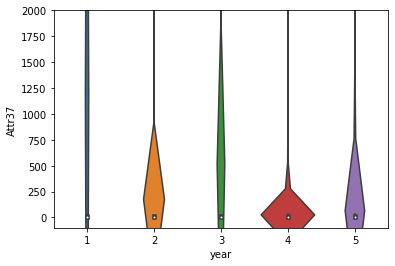

In [16]:
sns.violinplot(data=bankrupt_df, y="Attr37", x="year")
plt.ylim(-100, 2000)


In [17]:
print('mean: ',bankrupt_df.Attr37.groupby(bankrupt_df.year).mean())
print('median: ',bankrupt_df.Attr37.groupby(bankrupt_df.year).median())



mean:  year
1    173.453694
2     82.944360
3    102.697692
4     70.659877
5    114.025985
Name: Attr37, dtype: float64
median:  year
1    3.4383
2    2.8775
3    2.7273
4    3.1104
5    3.6564
Name: Attr37, dtype: float64


mean:  year
1    10.367516
2     2.645024
3     4.670725
4     1.218724
5     2.459377
Name: Attr21, dtype: float64
median:  year
1    1.137400
2    1.023500
3    0.955035
4    1.045700
5    1.117500
Name: Attr21, dtype: float64


(-250.0, 2000.0)

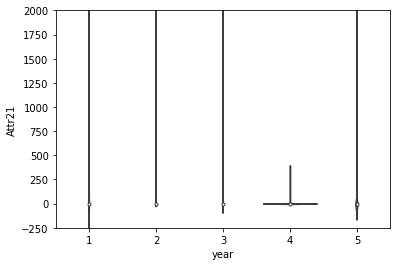

In [18]:
print('mean: ',bankrupt_df.Attr21.groupby(bankrupt_df.year).mean())
print('median: ',bankrupt_df.Attr21.groupby(bankrupt_df.year).median())
sns.violinplot(data=bankrupt_df, y="Attr21", x="year")
plt.ylim(-250, 2000)

In [21]:
from sklearn.impute import SimpleImputer

bankrupt_imputed = bankrupt_df
imputer = SimpleImputer(missing_values=np.nan, strategy='median',fill_value=None)
bankrupt_imputed.iloc[:,:] = imputer.fit_transform(bankrupt_imputed)


bankrupt_imputed.head(10)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,year,bankrupt
0,0.200550,0.379510,0.396410,2.0472,32.3510,0.38825,0.249760,1.33050,1.13890,0.50494,0.249760,0.659800,0.166600,0.249760,497.420,0.733780,2.6349,0.249760,0.149420,43.370,1.24790,0.214020,0.119980,0.477060,0.50494,0.604110,1.45820,1.76150,5.9443,0.11788,0.149420,94.1400,3.8772,0.56393,0.214020,1.74100,593.2700,0.50591,0.128040,0.662950,0.051402,0.128040,114.420,71.0500,1.00970,1.52250,49.394,0.185300,0.110850,2.04200,0.378540,0.25792,2.24370,2.2480,348690.0000,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.6580,4.4158,7.4277,1.0,0.0
1,0.209120,0.499880,0.472250,1.9447,14.7860,0.00000,0.258340,0.99601,1.69960,0.49788,0.261140,0.516800,0.158350,0.258340,677.960,0.538380,2.0005,0.258340,0.152000,87.981,1.42930,0.248060,0.123040,0.155100,0.39542,0.439920,88.44400,16.94600,3.6884,0.26969,0.152000,122.1700,2.9876,2.98760,0.206160,1.69960,3.0963,0.49788,0.121300,0.086422,0.064371,0.145950,199.490,111.5100,0.51045,1.12520,100.130,0.237270,0.139610,1.94470,0.499880,0.33472,17.86600,17.8660,2304.6000,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.3500,3.4000,60.9870,1.0,0.0
2,0.248660,0.695920,0.267130,1.5548,-1.1523,0.00000,0.309060,0.43695,1.30900,0.30408,0.312580,0.641840,0.244350,0.309060,794.160,0.459610,1.4369,0.309060,0.236100,73.133,1.42830,0.302600,0.189960,0.155100,0.28932,0.372820,86.01100,1.06270,4.3749,0.41929,0.238150,176.9300,2.0630,1.42740,0.315650,1.30900,2.3019,0.51537,0.241140,0.322020,0.074020,0.231170,165.510,92.3810,0.94807,1.01010,96.372,0.291810,0.222930,1.07580,0.481520,0.48474,1.20980,2.0504,6332.7000,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.2700,2.7185,5.2078,1.0,0.0
3,0.081483,0.307340,0.458790,2.4928,51.9520,0.14988,0.092704,1.86610,1.05710,0.57353,0.092704,0.301630,0.094257,0.092704,917.010,0.398030,3.2537,0.092704,0.071428,79.788,1.50690,0.115500,0.062782,0.171930,0.57353,0.361520,0.94076,1.96180,4.6511,0.14343,0.071428,91.3700,3.9948,0.37581,0.115500,1.35620,3.0963,0.57353,0.088995,0.401390,0.069622,0.088995,180.770,100.9800,0.28720,1.56960,84.344,0.085874,0.066165,2.49280,0.307340,0.25033,2.45240,2.4524,20545.0000,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.4350,4.2228,5.5497,1.0,0.0
4,0.187320,0.613230,0.229600,1.4063,-7.3128,0.18732,0.187320,0.63070,1.15590,0.38677,0.187320,0.331470,0.121820,0.187320,1133.200,0.322110,1.6307,0.187320,0.115530,57.045,1.04520,0.198320,0.115530,0.187320,0.38677,0.322110,1.41380,1.11840,4.1424,0.27884,0.115530,147.0400,2.4823,0.32340,0.198320,1.62780,11.2470,0.43489,0.122310,0.293040,0.096680,0.122310,141.620,84.5740,0.73919,0.95787,65.936,0.188110,0.116010,1.29590,0.565110,0.40285,1.88390,2.1184,3186.6000,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.2100,2.8692,7.8980,1.0,0.0
5,0.228220,0.497940,0.359690,1.7502,-47.7170,0.00000,0.281390,1.00830,1.97860,0.50206,0.286450,0.586910,0.148120,0.281390,620.140,0.588580,2.0083,0.281390,0.142220,107.260,1.72780,0.281040,0.115350,0.155100,0.49970,0.481810,55.51100,2.23590,4.3258,0.23382,0.144490,102.7600,3.5519,3.42000,0.275660,1.97860,22.3120,0.51361,0.139320,0.078634,0.056701,0.142040,147.840,40.5780,0.39250,0.53744,124.630,0.269350,0.136130,1.68520,0.479440,0.28154,3.12090,3.1927,7616.8000,0.139320,0.454570,0.85891,0.023002,3.4028,8.9949,88.4440,4.1269,12.2990,1.0,0.0
6,0.111090,0.647440,0.289710,1.4705,2.5349,0.00000,0.111090,0.54454,1.73480,0.35256,0.125750,0.180410,0.309630,0.111090,439.940,0.829650,1.5445,0.111090,0.064036,57.733,0.56811,0.000000,0.064036,0.155100,0.31469,0.829650,0.00000,3.06480,3.6770,0.36088,0.142230,328.7300,1.1103,1.0560

In [22]:
missing_values_imputed = pd.DataFrame(bankrupt_imputed.isna().sum())
missing_values_imputed = missing_values_imputed.rename(columns={missing_values_imputed.columns[0]: 'count'})
missing_values_imputed = missing_values_imputed.sort_values(by='count', key=abs, ascending=False)
missing_values_imputed.head()

,count
Attr1,0
Attr50,0
Attr36,0
Attr37,0
Attr38,0


In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_valid_index in split.split(bankrupt_imputed, bankrupt_imputed.bankrupt):
    bankrupt_modeling = bankrupt_imputed.iloc[train_index]
    bankrupt_validation = bankrupt_imputed.iloc[test_valid_index]

print("Size of modeling set (to be CV split): ",bankrupt_modeling.shape)
print("Size of hold back validation set: ",bankrupt_validation.shape)

Size of modeling set (to be CV split):  (39064, 66)
Size of hold back validation set:  (4341, 66)


In [24]:
#Create new X predictor matrix for training
X_train = bankrupt_modeling.drop(['bankrupt'],axis=1).values #droping target
y_train = bankrupt_modeling['bankrupt'].values
y_train = y_train.astype(int)

#Create new X predictor matrix for validation
X_validation = bankrupt_validation.drop(['bankrupt'],axis=1).values #droping target
y_validation = bankrupt_validation['bankrupt'].values
y_validation = y_validation.astype(int)


In [25]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

num_cv_iterations = 10
cv_object = StratifiedKFold(n_splits=num_cv_iterations, shuffle=True, random_state=27)

In [26]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


scorer = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

cv_results = sklearn.model_selection.cross_validate(rf, X_train, y_train, cv=cv_object, scoring=scorer, return_estimator=True, n_jobs=6) 
print("Mean Accuracy = ",cv_results['test_accuracy'].mean())
print("Mean Recall = ",cv_results['test_recall'].mean())
print("Mean Precision = ",cv_results['test_precision'].mean())

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Mean Accuracy =  0.9626766182142388
Mean Recall =  0.28164471462343804
Mean Precision =  0.8345816784290145
Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 15, 25, 50],
    'n_estimators': [50, 100, 300, 500],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [5, 10, 15],
    'class_weight': ['None', 'balanced'] 
}

# Random search of parameters search across 100 different combinations, and use all available scores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 25, cv = cv_object, verbose=2, random_state=42, n_jobs = 6, scoring='accuracy')
# Fit the random search model
rf_random.fit(X_train, y_train)

print("Best Accuracy: ",rf_random.best_score_)
print("Best Accuracy: ",rf_random.best_params_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] END class_weight=None, max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END class_weight=None, max_depth=15, min_samples_leaf=5, min_samples_split=10, n_esti

KeyboardInterrupt: 

In [29]:
from sklearn.metrics import confusion_matrix

def plot_confusion(cf_matrix):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=2)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
    cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n' for v1, v2 in
    zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    x_axis_labels = ['Not Bankrupt','Bankrupt']
    y_axis_labels = ['Not Bankrupt','Bankrupt']
    ax = plt.axes()
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    ax.set_title('   Bankruptcy Confusion Matrix\n')
    plt.xlabel("Predicted Category")
    plt.ylabel("True Category")

In [30]:
# Best Accuracy:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': 25, 'class_weight': 'balanced'}

rf = RandomForestClassifier(max_depth=25, n_estimators=100, min_samples_split=2, min_samples_leaf=10, class_weight='balanced')

training_model = rf.fit(X_train,y_train)
rf_validation_predictions = training_model.predict(X_validation)

print(rf_validation_predictions)

print("Validation Set Accuracy: ", accuracy_score(y_validation, rf_validation_predictions))
print("Validation Set Precision: ", precision_score(y_validation, rf_validation_predictions))
print("Validation Set Recall: ", recall_score(y_validation, rf_validation_predictions))




[0 0 0 ... 0 0 0]
Validation Set Accuracy:  0.9617599631421332
Validation Set Precision:  0.6503496503496503
Validation Set Recall:  0.4449760765550239


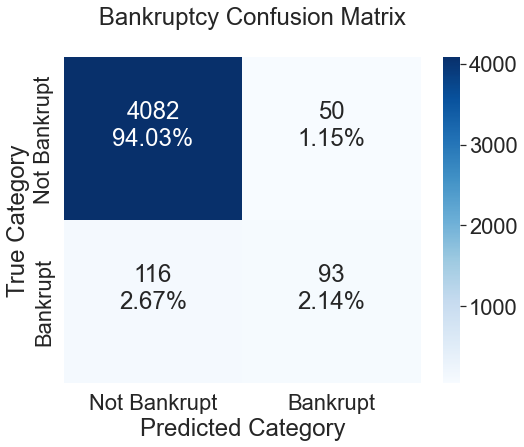

In [31]:
cm = confusion_matrix(y_validation,rf_validation_predictions)
plot_confusion(cm)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_validation,rf_validation_predictions, 
                            target_names=['Not Bankrupt','Bankrupt']))

              precision    recall  f1-score   support

Not Bankrupt       0.97      0.99      0.98      4132
    Bankrupt       0.65      0.44      0.53       209

    accuracy                           0.96      4341
   macro avg       0.81      0.72      0.75      4341
weighted avg       0.96      0.96      0.96      4341



## XGBoost

In [33]:
import xgboost as xgb

In [34]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_validation, y_validation)

In [35]:
eval_list = [(dtest,'eval'), (dtrain, 'train')]

In [36]:
num_round = 100
param = {
    'max_depth':10,
    'objective':'multi:softmax',
    'num_class':2,
    'eta': 0.01
}

In [37]:
xgb_model1 = xgb.train(param, dtrain, num_round, eval_list, early_stopping_rounds=2)

[11:32:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	eval-mlogloss:0.68429	train-mlogloss:0.68405
[1]	eval-mlogloss:0.67559	train-mlogloss:0.67517
[2]	eval-mlogloss:0.66710	train-mlogloss:0.66641
[3]	eval-mlogloss:0.65877	train-mlogloss:0.65784
[4]	eval-mlogloss:0.65060	train-mlogloss:0.64941
[5]	eval-mlogloss:0.64259	train-mlogloss:0.64116
[6]	eval-mlogloss:0.63473	train-mlogloss:0.63308
[7]	eval-mlogloss:0.62698	train-mlogloss:0.62514
[8]	eval-mlogloss:0.61941	train-mlogloss:0.61733
[9]	eval-mlogloss:0.61195	train-mlogloss:0.60967
[10]	eval-mlogloss:0.60466	train-mlogloss:0.60216
[11]	eval-mlogloss:0.59752	train-mlogloss:0.59480
[12]	eval-mlogloss:0.59049	train-mlogloss:0.58756
[13]	eval-mlogloss:0.58358	train-mlogloss:0

In [120]:
xgb_model2_cv_output = xgb.cv(params=param, dtrain=dtrain, num_boost_round=100, verbose_eval=True, early_stopping_rounds=5, folds=cv_object)

[15:18:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:18:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:18:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "scale_pos_we

KeyboardInterrupt: 

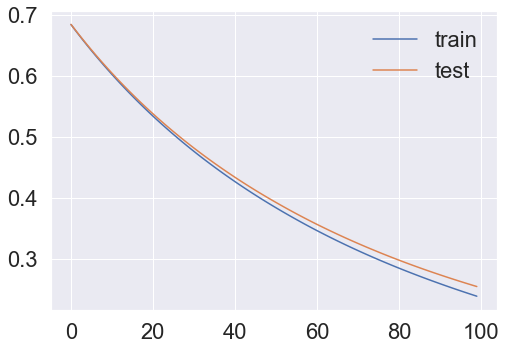

In [262]:
plt.plot(xgb_model2['train-mlogloss-mean'], label="train")
plt.plot(xgb_model2['test-mlogloss-mean'], label="test")
plt.legend()
plt.show()

In [58]:
num_round = 500
param = {
    'max_depth':10,
    'objective':'multi:softmax',
    'num_class':2,
    'eta': 0.01
}

xgb_model2_fit = xgb.train(param, dtrain, num_round, eval_list, early_stopping_rounds=5)

[12:05:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	eval-mlogloss:0.68429	train-mlogloss:0.68405
[1]	eval-mlogloss:0.67559	train-mlogloss:0.67517
[2]	eval-mlogloss:0.66710	train-mlogloss:0.66641
[3]	eval-mlogloss:0.65877	train-mlogloss:0.65784
[4]	eval-mlogloss:0.65060	train-mlogloss:0.64941
[5]	eval-mlogloss:0.64259	train-mlogloss:0.64116
[6]	eval-mlogloss:0.63473	train-mlogloss:0.63308
[7]	eval-mlogloss:0.62698	train-mlogloss:0.62514
[8]	eval-mlogloss:0.61941	train-mlogloss:0.61733
[9]	eval-mlogloss:0.61195	train-mlogloss:0.60967
[10]	eval-mlogloss:0.60466	train-mlogloss:0.60216
[11]	eval-mlogloss:0.59752	train-mlogloss:0.59480
[12]	eval-mlogloss:0.59049	train-mlogloss:0.58756
[13]	eval-mlogloss:0.58358	train-mlogloss:0

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(xgb_model1.predict(dtest),y_validation)

0.9709744298548721

In [63]:
num_round = 500
param = {
    'min_depth':8,
    'max_depth':14,
    'min_leaves': 24,
    'max_leaves': 62,
    'number_of_trees': 75,
    'number_of_internal_trees': 75,
    'objective':'multi:softmax',
    'num_class':2,
    'eta': 0.01
}

xgb_model2_fit = xgb.train(param, dtrain, num_round, eval_list, early_stopping_rounds=5)

[12:31:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "min_depth", "min_leaves", "number_of_internal_trees", "number_of_trees" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:31:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	eval-mlogloss:0.68425	train-mlogloss:0.68385
[1]	eval-mlogloss:0.67550	train-mlogloss:0.67476
[2]	eval-mlogloss:0.66698	train-mlogloss:0.66585
[3]	eval-mlogloss:0.65860	train-mlogloss:0.65711
[

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(xgb_model2_fit.predict(dtest),y_validation)

0.9753513015434232

random grid search

In [103]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
import sys

if not sys.warnoptions:
    import os, warnings
    warnings.simplefilter("default") # Change the filter in this process
    os.environ["PYTHONWARNINGS"] = "default" # Also affect subprocesses

def fxn():
    warnings.warn("deprecated", DeprecationWarning)
    warnings.warn("user", UserWarning)
    warnings.warn("future", FutureWarning)



with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [104]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import time

num_round = 300

xgb_clf = XGBClassifier(use_label_encoder=False, num_round=num_round)

num_searches = 10

params = {
        'eta':[0.001, 0.01,0.1],
        'min_depth':[2,5,8],
        'max_depth':[5,15,20],
        'min_leaves': [5,10,15,25],
        'max_leaves': [30,50,70],
        'min_child_weight': [5, 10, 15],
        'gamma': [1, 1.5, 2, 2.5],
        'subsample': [0.6, 0.8, 1.0],
        'number_of_trees': [50,75,100],
        'number_of_internal_trees': [50,75,100],
        'scale_pos_weight': [1,10,20,30]
        }


rs_clf = RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=num_searches, scoring='accuracy', n_jobs=6, cv=cv_object, verbose=3, random_state=42)
print("Randomized search..")
search_time_start = time.time()
rs_clf.fit(X_train, y_train)
print("Randomized search time:", time.time() - search_time_start)


Randomized search..
Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning

[14:14:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "min_depth", "min_leaves", "number_of_internal_trees", "number_of_trees" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:14:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "min_depth", "min_leaves", "number_of_internal_trees", "number_of_trees" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:14:36] WARNING: /Users/r

In [105]:
best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: 0.9770888597684175
Best params: 
eta: 0.1
gamma: 2
max_depth: 15
max_leaves: 50
min_child_weight: 5
min_depth: 2
min_leaves: 25
number_of_internal_trees: 75
number_of_trees: 50
scale_pos_weight: 20
subsample: 0.6


In [157]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import time

xgb_clf = XGBClassifier(use_label_encoder=False)

num_searches = 10

params = {
        'eta':[0.001, 0.01,0.1],
        'max_depth':[5,15,20],
        'max_leaves': [30,50,70],
        'min_child_weight': [5, 10, 15],
        'gamma': [1, 1.5, 2, 2.5],
        'subsample': [0.6, 0.8, 1.0],
        'scale_pos_weight': [1,10,20,30]
        }


rs_clf = RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=num_searches, scoring='roc_auc', n_jobs=6, cv=cv_object, verbose=3, random_state=42)
print("Randomized search..")
search_time_start = time.time()
rs_clf.fit(X_train, y_train)
print("Randomized search time:", time.time() - search_time_start)

Randomized search..
Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning

[11:25:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:25:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:25:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:25:56] WARNING: /Users/runner/miniforge3/cond

In [158]:
best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: 0.9750453108884665
Best params: 
eta: 0.1
gamma: 1.5
max_depth: 15
max_leaves: 50
min_child_weight: 15
scale_pos_weight: 20
subsample: 1.0


In [121]:
import xgboost as xgb

num_round = 500

param = {
    'max_depth':15,
    'max_leaves': 70,
    'min_child_weight': 15,
    'scale_pos_weight': 20,
    'subsample': 0.8,
    'objective':'multi:softmax',
    'num_class':2,
    'eta': 0.1,
    'gamma': 2.5
}

#xgb_model_tuned = xgb.train(param, dtrain, num_round, eval_list, early_stopping_rounds=5)
xgb_model_tuned_output = xgb.cv(params=param, dtrain=dtrain, num_boost_round=num_round, verbose_eval=True, early_stopping_rounds=5, folds=cv_object)

[15:19:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:19:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:19:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "scale_pos_we

In [123]:
xgb_model_tuned_output.head()

,train-mlogloss-mean,train-mlogloss-std,test-mlogloss-mean,test-mlogloss-std
0,0.608251,0.000149,0.609032,0.000438
1,0.538730,0.000224,0.540170,0.000837
2,0.480544,0.000296,0.482627,0.001095
3,0.431227,0.000372,0.433935,0.001405
4,0.389127,0.000395,0.392389,0.001628


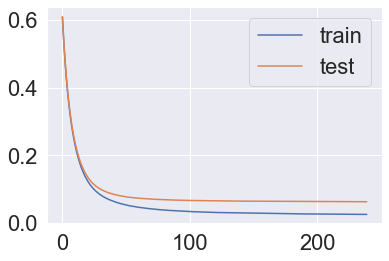

In [124]:
plt.plot(xgb_model_tuned_output['train-mlogloss-mean'], label="train")
plt.plot(xgb_model_tuned_output['test-mlogloss-mean'], label="test")
plt.legend()
plt.show()

In [127]:
num_round = 244

xgb_tuned_fit = xgb.train(param, dtrain, num_round, eval_list, early_stopping_rounds=5)

[15:36:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:36:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	eval-mlogloss:0.60979	train-mlogloss:0.60829
[1]	eval-mlogloss:0.54110	train-mlogloss:0.53847
[2]	eval-mlogloss:0.48348	train-mlogloss:0.47994
[3]	eval-mlogloss:0.43509	train-mlogloss:0.43059
[4]	eval-mlogloss:0.39388	train-mlogloss:0.38834
[5]	ev

In [218]:
xgb_predictions = xgb_tuned_fit.predict(dtest)
accuracy_score(xgb_predictions,y_validation)

0.9785763648928818

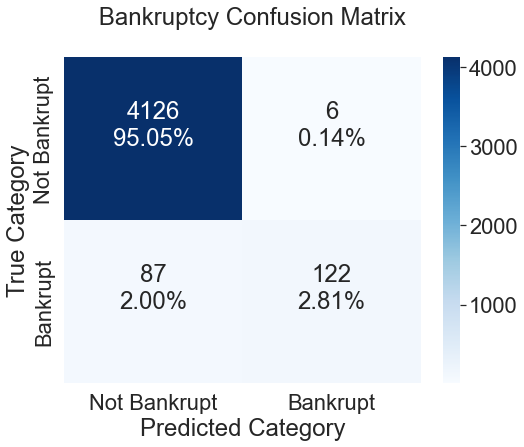

In [130]:

cm = confusion_matrix(y_validation,xgb_predictions)
plot_confusion(cm)

In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_validation,xgb_predictions, 
                            target_names=['Not Bankrupt','Bankrupt']))

              precision    recall  f1-score   support

Not Bankrupt       0.98      1.00      0.99      4132
    Bankrupt       0.95      0.58      0.72       209

    accuracy                           0.98      4341
   macro avg       0.97      0.79      0.86      4341
weighted avg       0.98      0.98      0.98      4341



Reduce features using feature selection by importance

Use SMOTE for resampling to compare

In [141]:
from sklearn.feature_selection import RFECV

min_features_to_select = 1  # Minimum number of features to consider

rfecv = RFECV(
    estimator=XGBClassifier(),
    step=1,
    cv=cv_object,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)



[08:57:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:57:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:57:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:57:19] WARNING: /Users/runner/miniforge3/cond

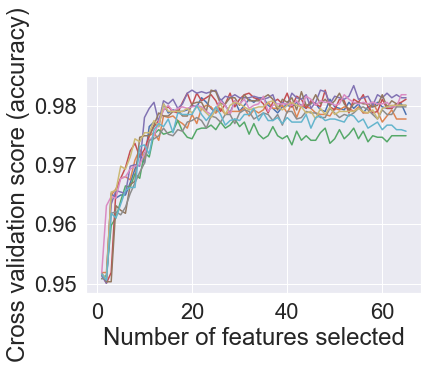

In [142]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [144]:
rfecv.grid_scores_.shape

(65, 10)

In [145]:
rfecv.ranking_

array([33, 30,  6,  1,  1,  1,  9, 28,  5, 15,  1, 26,  1, 34, 32, 19, 31,
       35,  1,  1,  1,  1, 22,  1,  1,  1,  1, 13,  2,  1, 12,  1,  1,  1,
        1,  4, 16,  1,  1,  1,  1,  1, 29,  1, 18,  1,  1,  1,  8, 27, 11,
       10, 23, 24,  3,  1, 20,  1, 21,  7,  1, 25, 14, 17,  1])

In [150]:
rfecv.cv_results_['mean_test_score']

array([0.95146427, 0.95202754, 0.96093595, 0.96393095, 0.96546686,
       0.96618359, 0.96815481, 0.96969067, 0.97138035, 0.97299319,
       0.97475941, 0.97642334, 0.97655136, 0.97842005, 0.97824086,
       0.97806164, 0.97847126, 0.97836886, 0.97872729, 0.97903449,
       0.97952087, 0.9795976 , 0.97905996, 0.9795976 , 0.97957209,
       0.97946962, 0.97906004, 0.97936722, 0.97964881, 0.97936724,
       0.98003281, 0.97949522, 0.9797256 , 0.97941843, 0.97964887,
       0.97929047, 0.97946964, 0.97895765, 0.97893204, 0.97936724,
       0.9793417 , 0.97921363, 0.97934165, 0.97934169, 0.97898323,
       0.97903447, 0.9792393 , 0.97941843, 0.97906009, 0.97903449,
       0.97939284, 0.97921366, 0.97916247, 0.97959765, 0.97931605,
       0.97936725, 0.97885529, 0.97888085, 0.97880406, 0.9790857 ,
       0.97885532, 0.97903448, 0.97908568, 0.97923929, 0.97908571])

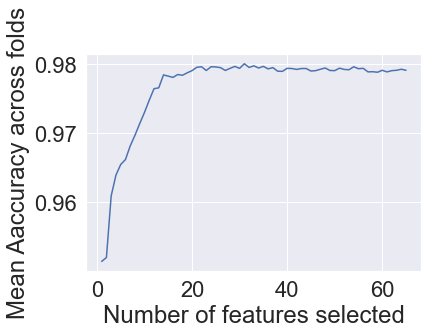

In [151]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean Aaccuracy across folds")
plt.plot(
    range(min_features_to_select, len(rfecv.cv_results_['mean_test_score']) + min_features_to_select),
    rfecv.cv_results_['mean_test_score'],
)
plt.show()

In [221]:
param = {
    'max_depth':15,
    'max_leaves': 70,
    'min_child_weight': 15,
    'scale_pos_weight': 20,
    'subsample': 0.8,
    'objective':'multi:softmax',
    'num_class':2,
    'eta': 0.1,
    'gamma': 2.5
}


min_features_to_select = 1  # Minimum number of features to consider

XGBC_final = XGBClassifier(**param, cv=cv_object)

XGBC_final.fit(X_train, y_train, eval_metric='logloss')

XGBC_final_predictions = XGBC_final.predict(X_validation)
accuracy_score(XGBC_final_predictions,y_validation)



[14:34:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.9788067265607003

((array([-3.5990974 , -3.36153624, -3.23048904, ...,  3.23048904,
          3.36153624,  3.5990974 ]),
  array([2.4891890e-06, 2.6676078e-06, 3.2526762e-06, ..., 9.9994409e-01,
         9.9997401e-01, 9.9998653e-01], dtype=float32)),
 (0.07954787419406223, 0.0385603904724121, 0.48887024602003637))

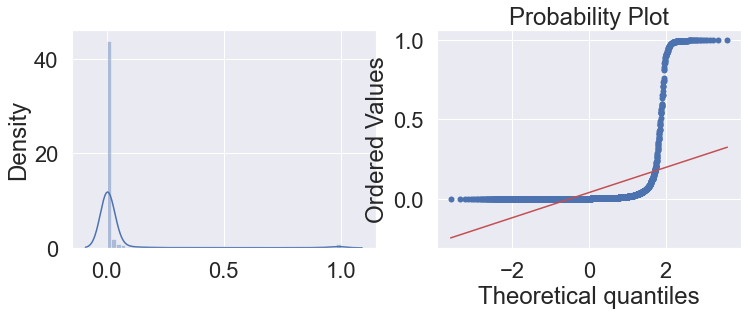

In [222]:
import scipy.stats as stats

fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.distplot(XGBC_class1_prob, ax=ax[0])
stats.probplot(XGBC_class1_prob, dist="norm", plot=ax[1])

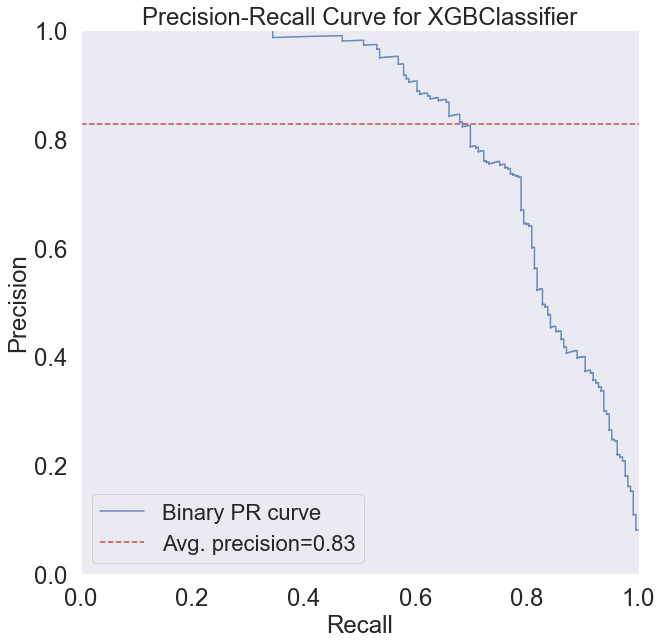

<AxesSubplot:title={'center':'Precision-Recall Curve for XGBClassifier'}, xlabel='Recall', ylabel='Precision'>

In [223]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(XGBC_final, per_class=True, size=(720, 720))
viz.fit(X_train, y_train)
viz.score(X_validation, y_validation)
for legend in viz.ax.texts:
    legend.set_fontsize(24)
for xtick,ytick in zip(viz.ax.xaxis.get_major_ticks(),viz.ax.yaxis.get_major_ticks()):
    xtick.label.set_fontsize(24) 
    ytick.label.set_fontsize(24)
viz.show()

[17:05:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:05:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:05:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mist

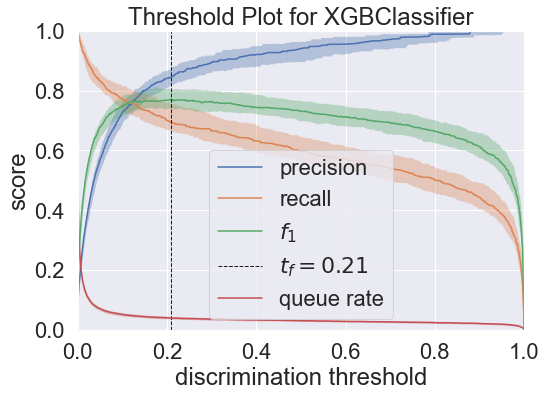

<AxesSubplot:title={'center':'Threshold Plot for XGBClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [258]:
from yellowbrick.classifier import DiscriminationThreshold

XGBC_threshold1 = XGBClassifier(params=param)
# Instantiate the classification model and visualizer
visualizer = DiscriminationThreshold(XGBC_threshold1)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

Accuracy:  0.9771941948859709
Precision:  0.7081339712918661
Recall:  0.7956989247311828


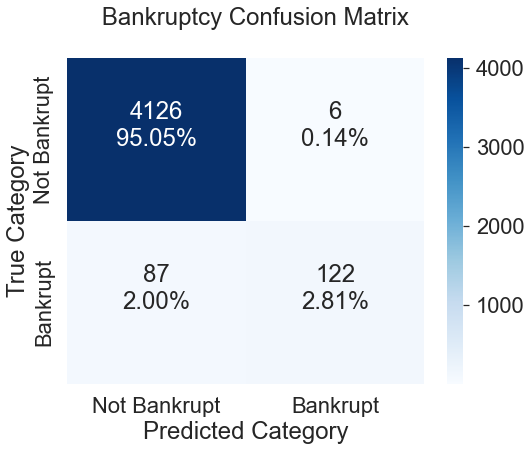

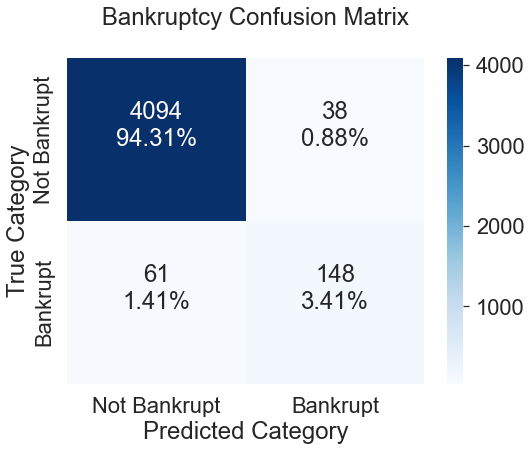

In [228]:
cutoff=0.18

XGBC_class1_pred0_5 = pd.DataFrame(XGBC_class1_prob)

XGBC_class1_pred0_5[XGBC_class1_pred0_5<cutoff]=0
XGBC_class1_pred0_5[XGBC_class1_pred0_5>=cutoff]=1

print("Accuracy: ",accuracy_score(XGBC_class1_pred0_5,y_validation))
print("Precision: ",precision_score(XGBC_class1_pred0_5,y_validation))
print("Recall: ",recall_score(XGBC_class1_pred0_5,y_validation))

cm = confusion_matrix(y_validation,xgb_predictions)
plot_confusion(cm)

cm = confusion_matrix(y_validation,XGBC_class1_pred0_5)
plot_confusion(cm)

Re-do grid search for best roc_auc then tune cutoff for max accuracy

In [226]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import time

xgb_clf = XGBClassifier(use_label_encoder=False)

num_searches = 10

params = {
        'eta':[0.001, 0.01,0.1],
        'max_depth':[5,15,20],
        'max_leaves': [30,50,70],
        'min_child_weight': [5, 10, 15],
        'gamma': [1, 1.5, 2, 2.5],
        'subsample': [0.6, 0.8, 1.0],
        'scale_pos_weight': [1,10,20,30]
        }


rs_clf = RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=num_searches, scoring='roc_auc', n_jobs=6, cv=cv_object, verbose=3, random_state=42)
print("Randomized search..")
search_time_start = time.time()
rs_clf.fit(X_train, y_train)
print("Randomized search time:", time.time() - search_time_start)

Randomized search..
Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning

[16:02:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:02:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:02:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:02:21] WARNING: /Users/runner/miniforge3/cond

Best 

In [227]:
best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: 0.9750453108884665
Best params: 
eta: 0.1
gamma: 1.5
max_depth: 15
max_leaves: 50
min_child_weight: 15
scale_pos_weight: 20
subsample: 1.0


In [229]:
param = {
    'max_depth':15,
    'max_leaves': 50,
    'min_child_weight': 15,
    'scale_pos_weight': 20,
    'subsample': 1.0,
    'objective':'multi:softmax',
    'num_class':2,
    'eta': 0.1,
    'gamma': 1.5
}

XGBC_auc_tuned = XGBClassifier(**param, cv=cv_object)

XGBC_auc_tuned.fit(X_train, y_train, eval_metric='logloss')

XXGBC_auc_tuned_predictions = XGBC_auc_tuned.predict(X_validation)
accuracy_score(XXGBC_auc_tuned_predictions,y_validation)

[16:28:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.9762727482146971

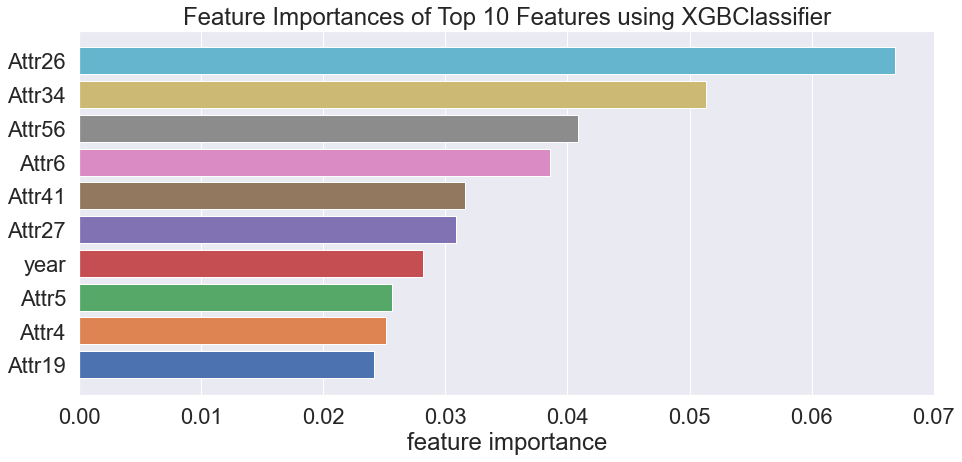

<AxesSubplot:title={'center':'Feature Importances of Top 10 Features using XGBClassifier'}, xlabel='feature importance'>

In [271]:

from yellowbrick.model_selection import FeatureImportances
features=bankrupt_modeling.drop(['bankrupt'],axis=1).columns

X_as_df = pd.DataFrame(bankrupt_modeling.drop(['bankrupt'],axis=1))
df_base = X_as_df.set_axis(features, axis=1, inplace=False)

viz = FeatureImportances(XGBC_auc_tuned, stack=False, relative=False, topn=10, size=(1000, 500))
viz.fit(df_base, y_train)
#viz.ax.legend(bbox_to_anchor=(1.0, 0.5), fontsize=16)
viz.show()

[16:30:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:30:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:30:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings b

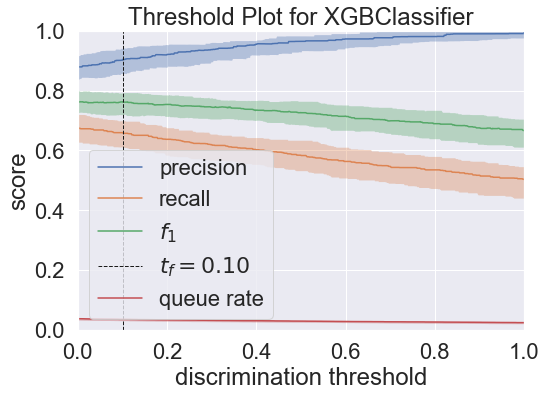

<AxesSubplot:title={'center':'Threshold Plot for XGBClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [230]:
from yellowbrick.classifier import DiscriminationThreshold

XGBC_threshold2 = XGBClassifier(max_depth=15,max_leaves=50,min_child_weight=15,scale_pos_weight=20,subsample=1.0,objective='multi:softmax',num_class=2,eta=0.1,gamma=1.5)

# Instantiate the classification model and visualizer
visualizer = DiscriminationThreshold(XGBC_threshold2)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [251]:
XXGBC_auc_tuned_proba = XGBC_auc_tuned.predict_proba(X_validation)


In [256]:
XGBC_class1_pred0_5 = pd.DataFrame(XXGBC_auc_tuned_proba[:,1:2])
XGBC_class1_pred0_5.head(10)

,0
0,-3.128397
1,-1.136486
2,-2.593063
3,-1.590715
4,-2.222778
5,-3.251939
6,-1.409436
7,-1.514687
8,-2.586612
9,-2.879147


Accuracy:  0.9762727482146971
Precision:  0.5454545454545454
Recall:  0.9344262295081968


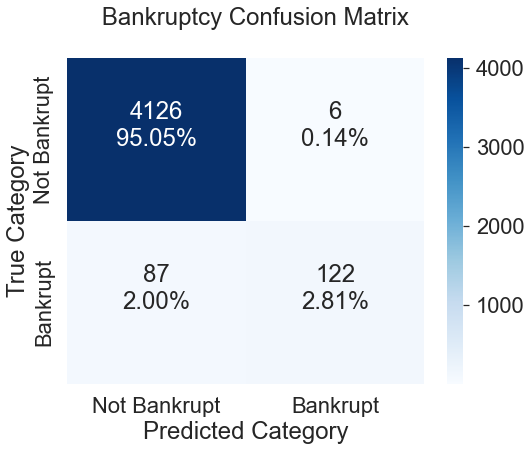

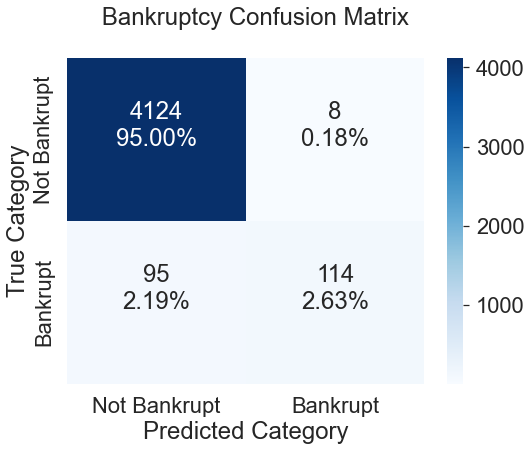

In [261]:
cutoff=0.21

XGBC_class1_pred0_5 = pd.DataFrame(XXGBC_auc_tuned_proba[:,1:2])
(XXGBC_auc_tuned_proba[1])

XGBC_class1_pred0_5[XGBC_class1_pred0_5<cutoff]=0
XGBC_class1_pred0_5[XGBC_class1_pred0_5>=cutoff]=1

print("Accuracy: ",accuracy_score(XGBC_class1_pred0_5,y_validation))
print("Precision: ",precision_score(XGBC_class1_pred0_5,y_validation))
print("Recall: ",recall_score(XGBC_class1_pred0_5,y_validation))

cm = confusion_matrix(y_validation,xgb_predictions)
plot_confusion(cm)

cm = confusion_matrix(y_validation,XGBC_class1_pred0_5)
plot_confusion(cm)

Look at sklearn api and re-do grid with n_estimators included
Use predict_proba to look at cutoff points

do grid search with recall as scoring metric instead of accuracy, see if params change much and what max recall is

https://xgboost.readthedocs.io/en/latest/python/python_api.html